# import

In [3]:
import random
import time

In [6]:
n = 1000 # here to change the input n
unsort_list = list(range(n))
random.shuffle(unsort_list)

def time_count(fun, the_list):
    the_t1 = time.time()
    fun(the_list)
    the_t2 = time.time()
    return the_t2-the_t1

# 1. Selection Sort

In [7]:


def selection_sort(the_list):
    m = len(the_list)
    for i1 in range(m):
        the_min_id = i1
        the_min = the_list[the_min_id]
        for j in range(i1 + 1, m):
            if the_list[j] < the_min:
                the_min_id = j
                the_min = the_list[j]
        the_list[the_min_id] = the_list[i1]
        the_list[i1] = the_min
    return the_list

copy_of_list = unsort_list.copy()

# print(selection_sort(copy_of_list))
print(time_count(selection_sort, copy_of_list))

  

0.019451141357421875


# 2. Merge Sort

In [4]:


def merge_sort(the_list):
    if len(the_list) <= 1:
        return the_list
    middle = len(the_list) // 2
    left = merge_sort(the_list[:middle])
    right = merge_sort(the_list[middle:])
    i1 = j = 0
    ans = []
    while i1 < len(left) or j < len(right):
        
        if j >= len(right):
            ans.append(left[i1])
            i1+=1
        elif i1 >= len(left):
            ans.append(right[j])
            j+=1
        elif left[i1] < right[j]:
            ans.append(left[i1])
            i1+=1
        else:
            ans.append(right[j])
            j+=1
    return ans
    
copy_of_list = unsort_list.copy()

# print(merge_sort(copy_of_list))
print(time_count(merge_sort, copy_of_list))


0.002010345458984375


# 3. Quick Sort V1

In [5]:
def quick_sort_v1(the_list):
    if len(the_list) <= 1:
        return the_list
    pivot = the_list[0]
    left = []
    right = []
    for num1 in the_list[1:]:
        if num1 < pivot:
            left.append(num1)
        else:
            right.append(num1)
    left, right = quick_sort_v1(left), quick_sort_v1(right)
    ans = left + [pivot] + right
    return ans
    


copy_of_list = unsort_list.copy()

# print(quick_sort_v1(copy_of_list))
print(time_count(quick_sort_v1, copy_of_list))

0.0010457038879394531


# 4. Quick Sort V2

In [6]:


def quick_sort_v2(the_list):
    m = len(the_list)
    if m <= 1:
        return the_list
    i1, i2, i3 = 0, m//2, m-1
    first, middle, last = the_list[i1], the_list[i2], the_list[i3]
    
    if first > middle and first > last:
        pivot = first
        the_i = i1
    elif middle > first and middle > last:
        pivot = middle
        the_i = i2
    else:
        pivot = last
        the_i = i3
    
    left = []
    right = []
    
    for num1 in the_list[:the_i]:
        if num1 < pivot:
            left.append(num1)
        else:
            right.append(num1)
    
    for num1 in the_list[the_i + 1:]:
        if num1 < pivot:
            left.append(num1)
        else:
            right.append(num1)
    
    
    left, right = quick_sort_v2(left), quick_sort_v2(right)
    ans = left + [pivot] + right
    return ans
    

copy_of_list = unsort_list.copy()

# print(quick_sort_v2(copy_of_list))
print(time_count(quick_sort_v2, copy_of_list))

0.0009999275207519531


In [7]:


data_lengths = [1000, 5000, 10000, 50000, 100000, 150000]


execution_times = {
    'Selection Sort': [0,0,0,0,0,0], 
    'Merge Sort': [0,0,0,0,0,0],
    'Quick Sort V1': [0,0,0,0,0,0],
    'Quick Sort V2': [0,0,0,0,0,0]
}


for itr in range(3):
    for i in range(len(data_lengths)):
        num = data_lengths[i]
        unsort_list = list(range(num))
        random.shuffle(unsort_list)
        
        copy_of_list = unsort_list.copy()
        execution_times['Selection Sort'][i] += time_count(selection_sort, copy_of_list)
        
        copy_of_list = unsort_list.copy()
        execution_times['Merge Sort'][i] += time_count(merge_sort, copy_of_list)
        
        copy_of_list = unsort_list.copy()
        execution_times['Quick Sort V1'][i] += time_count(quick_sort_v1, copy_of_list)
        
        copy_of_list = unsort_list.copy()
        execution_times['Quick Sort V2'][i] += time_count(quick_sort_v2, copy_of_list)
        


for key, val in execution_times.items():
    print(key, val)

Selection Sort [0.05415630340576172, 1.403318166732788, 5.30583643913269, 136.3224172592163, 546.4761335849762, 1259.7145478725433]
Merge Sort [0.0060503482818603516, 0.032533884048461914, 0.07454729080200195, 0.43705224990844727, 0.9421939849853516, 1.5724611282348633]
Quick Sort V1 [0.003001689910888672, 0.014745235443115234, 0.03501296043395996, 0.19148516654968262, 0.4537839889526367, 0.6606767177581787]
Quick Sort V2 [0.0030019283294677734, 0.018506765365600586, 0.03751635551452637, 0.23979592323303223, 0.498645544052124, 0.7749426364898682]


In [8]:
for key, val in execution_times.items():
    for i in range(len(val)):
        val[i] /= 3

for key, val in execution_times.items():
    print(key, val)

Selection Sort [0.018052101135253906, 0.4677727222442627, 1.7686121463775635, 45.440805753072105, 182.15871119499207, 419.9048492908478]
Merge Sort [0.002016782760620117, 0.01084462801615397, 0.024849096934000652, 0.14568408330281576, 0.3140646616617839, 0.5241537094116211]
Quick Sort V1 [0.0010005633036295574, 0.004915078481038411, 0.011670986811319986, 0.06382838884989421, 0.1512613296508789, 0.22022557258605957]
Quick Sort V2 [0.0010006427764892578, 0.006168921788533528, 0.012505451838175455, 0.07993197441101074, 0.166215181350708, 0.25831421216328937]


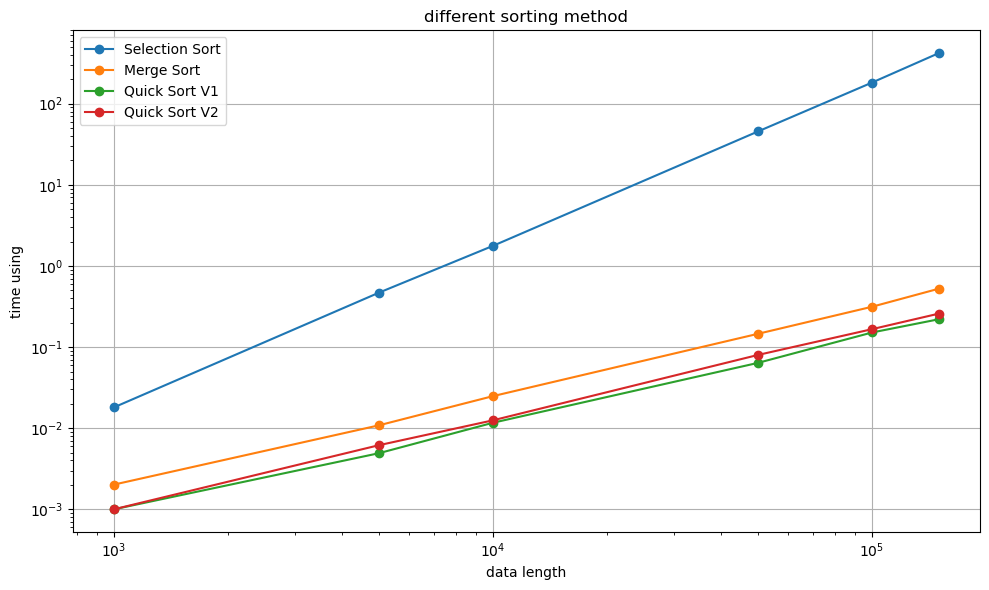

In [9]:
import matplotlib.pyplot as plt

sorting_methods = ['Selection Sort', 'Merge Sort', 'Quick Sort V1', 'Quick Sort V2']
data_lengths = [1000, 5000, 10000, 50000, 100000, 150000]


plt.figure(figsize=(10, 6))

for method in sorting_methods:
    plt.plot(data_lengths, execution_times[method], marker='o', label=method)

plt.xlabel('data length')
plt.ylabel('time using')
plt.title('different sorting method')
plt.xticks(data_lengths)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


<Figure size 1000x600 with 0 Axes>

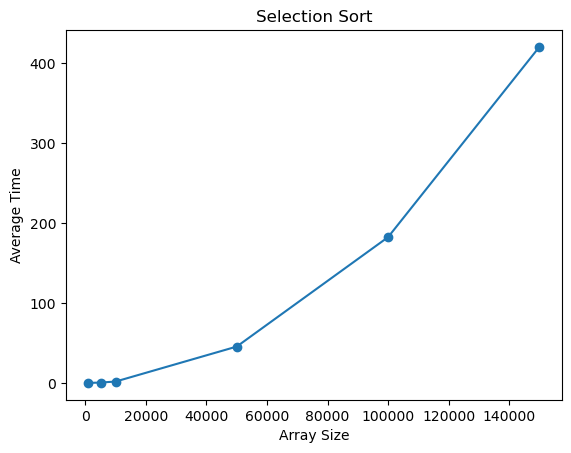

<Figure size 1000x600 with 0 Axes>

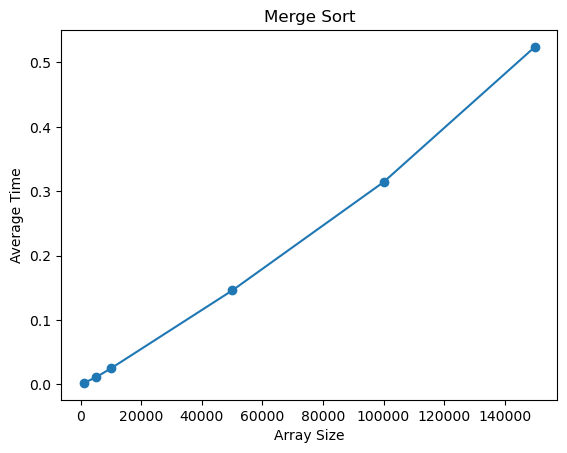

<Figure size 1000x600 with 0 Axes>

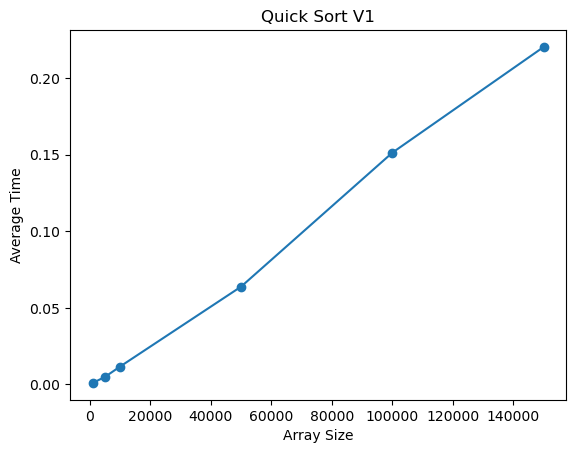

<Figure size 1000x600 with 0 Axes>

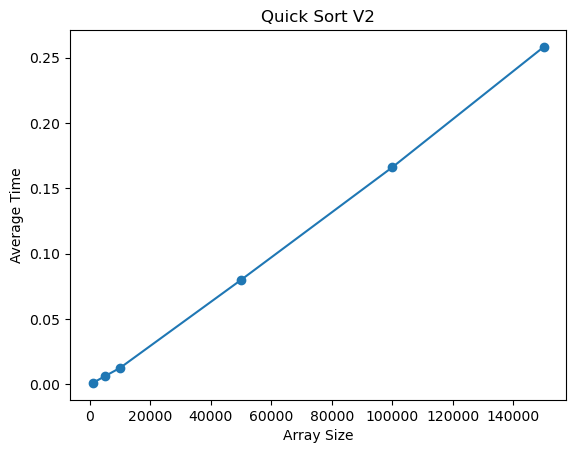

In [10]:
sorting_methods = ['Selection Sort', 'Merge Sort', 'Quick Sort V1', 'Quick Sort V2']
data_lengths = [1000, 5000, 10000, 50000, 100000, 150000]


for method in sorting_methods:
    plt.figure(figsize=(10, 6))

    fig, ax = plt.subplots()

    ax.plot(data_lengths, execution_times[method], marker='o')
    
    ax.set_xlabel('Array Size')
    ax.set_ylabel('Average Time')
    
    ax.set_title(method)
    
    plt.show()


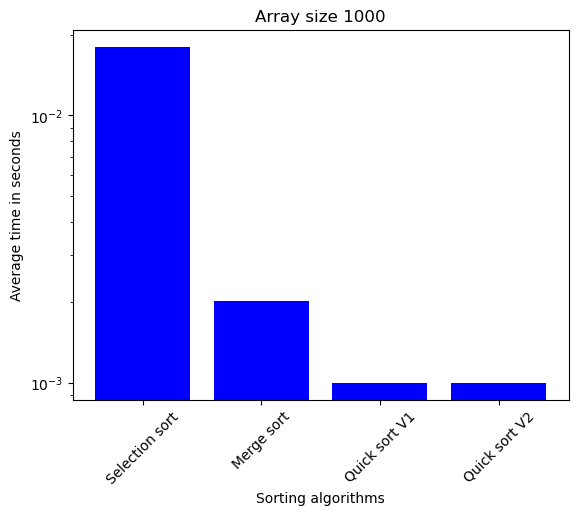

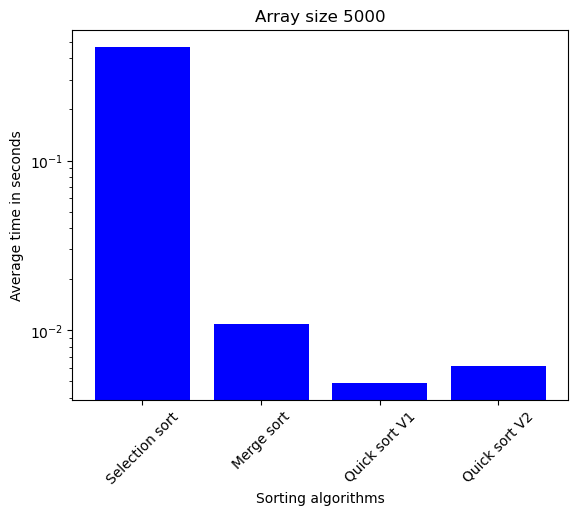

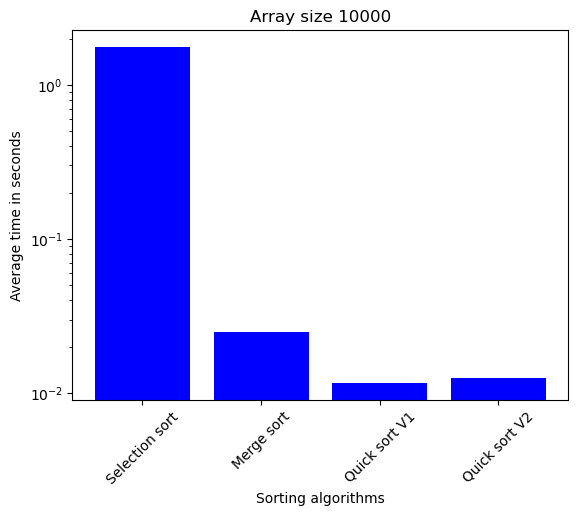

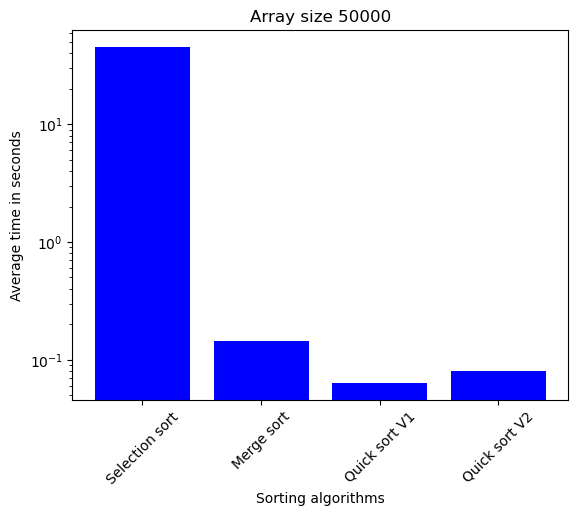

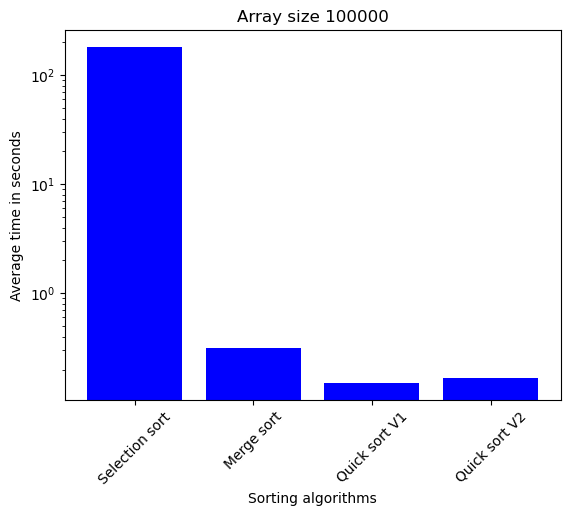

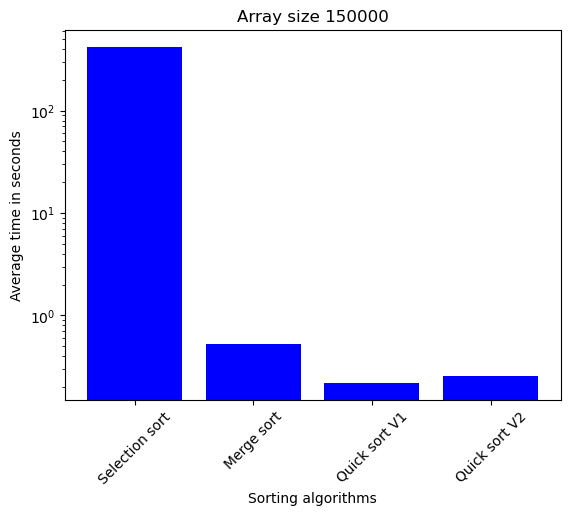

In [11]:
algorithms = ['Selection sort', 'Merge sort', 'Quick sort V1', 'Quick sort V2']
for i in range(len(data_lengths)):
    avg_times = [execution_times[method][i] for method in sorting_methods]
    
    fig, ax = plt.subplots()
    
    x_pos = range(len(sorting_methods))
    
    bars = ax.bar(x_pos, avg_times, color='b')
    
    ax.set_title(f'Array size {data_lengths[i]}')
    ax.set_xlabel('Sorting algorithms')
    ax.set_ylabel('Average time in seconds')
    ax.set_yscale('log')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(algorithms)
    
    plt.xticks(rotation=45)
    
    plt.show()

